Natural Asia Dry
pars [6.9521806  0.07708632 2.15537494]  cov [[ 3.91531353e-03 -1.62721447e-05 -6.09269122e-04]
 [-1.62721447e-05  7.47557890e-08  2.51436803e-06]
 [-6.09269122e-04  2.51436803e-06  9.48854014e-05]]
<class 'numpy.ndarray'>


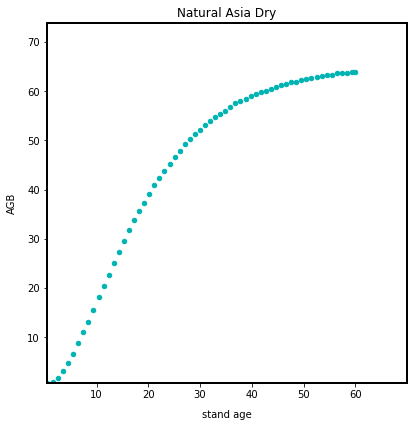

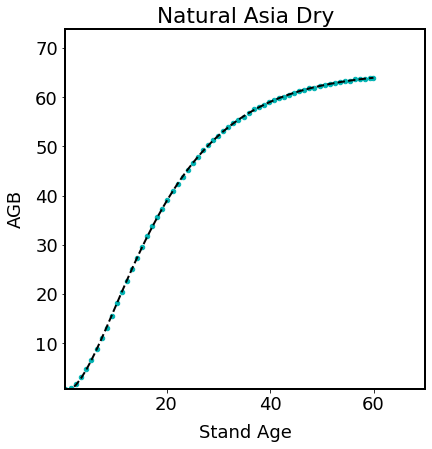

Natural Asia Humid
pars [22.20201289  0.08282659  1.65756327]  cov [[ 4.22745346e-02 -3.50576807e-05 -1.00987669e-03]
 [-3.50576807e-05  3.36450914e-08  8.34518105e-07]
 [-1.00987669e-03  8.34518105e-07  2.41301460e-05]]
<class 'numpy.ndarray'>


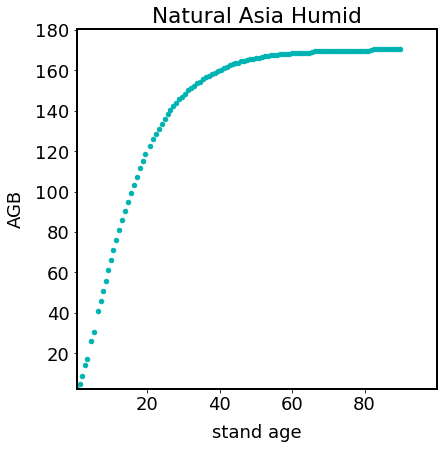

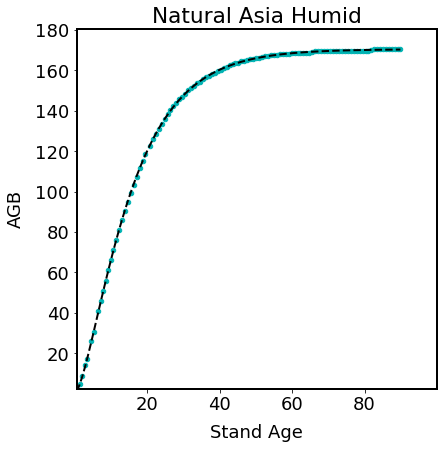

Natural Euro Humid Dry
pars [6.67396619 0.06740176 2.25457077]  cov [[ 1.03022416e-03 -3.69685902e-06 -1.79826143e-04]
 [-3.69685902e-06  1.47852440e-08  6.41598558e-07]
 [-1.79826143e-04  6.41598558e-07  3.14067726e-05]]
<class 'numpy.ndarray'>


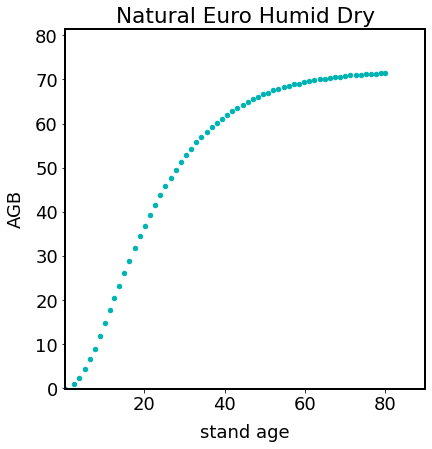

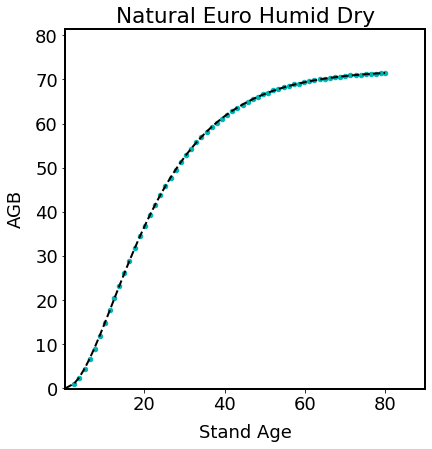

Natural Afica Humid
pars [9.00912153 0.06691875 2.21404218]  cov [[ 3.77532111e-03 -8.68682279e-06 -4.14808983e-04]
 [-8.68682279e-06  2.23318933e-08  9.49460355e-07]
 [-4.14808983e-04  9.49460355e-07  4.55973878e-05]]
<class 'numpy.ndarray'>


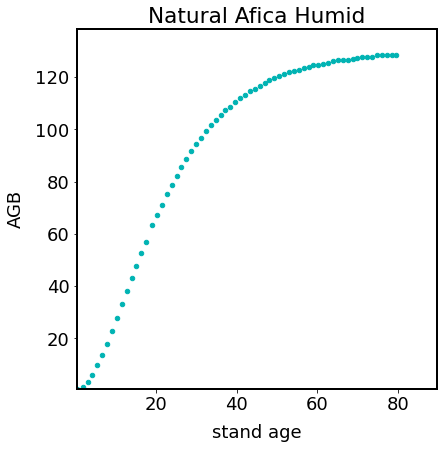

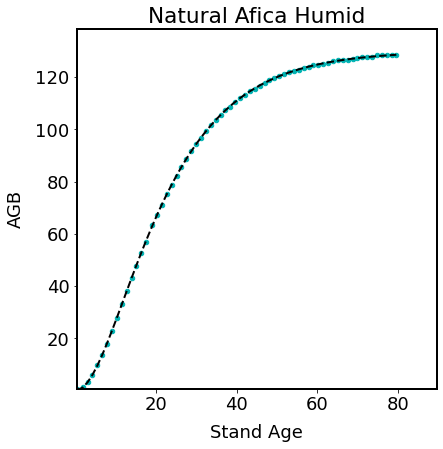

Central America Dry
pars [8.66429742 0.20962914 1.70824087]  cov [[ 1.00335138e-02 -7.51535439e-05 -9.07796804e-04]
 [-7.51535439e-05  6.54829595e-07  6.77127235e-06]
 [-9.07796804e-04  6.77127235e-06  8.21659989e-05]]
<class 'numpy.ndarray'>


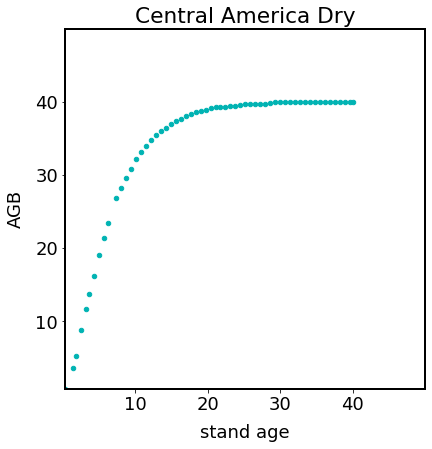

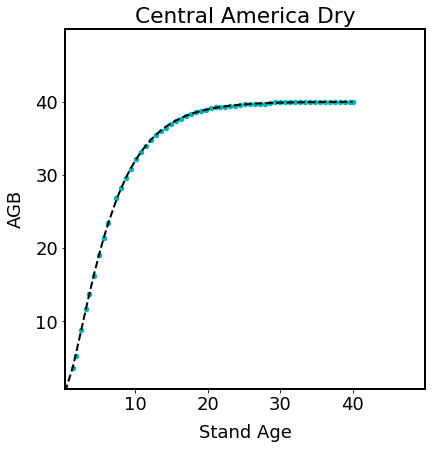

Central America Humid
pars [8.46189029 0.05691489 2.17789147]  cov [[ 5.81899181e-03 -1.21483965e-05 -6.90581830e-04]
 [-1.21483965e-05  2.84375235e-08  1.43463683e-06]
 [-6.90581830e-04  1.43463683e-06  8.19909979e-05]]
<class 'numpy.ndarray'>


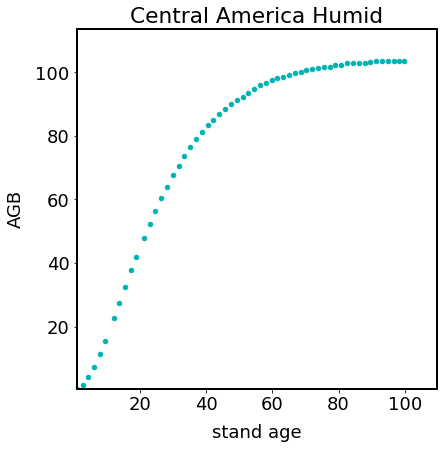

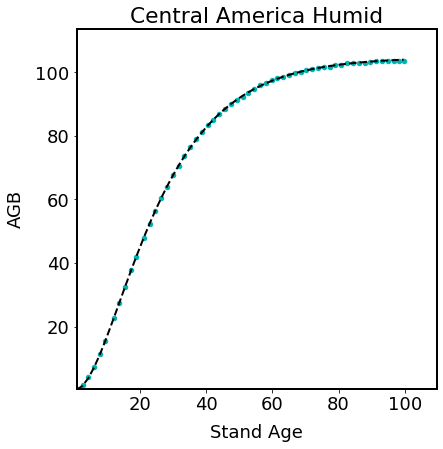

South America Dry
pars [7.38732164 0.09216976 2.15753241]  cov [[ 1.47194173e-02 -5.67206280e-05 -2.12856401e-03]
 [-5.67206280e-05  2.46620762e-07  8.17252910e-06]
 [-2.12856401e-03  8.17252910e-06  3.07902678e-04]]
<class 'numpy.ndarray'>


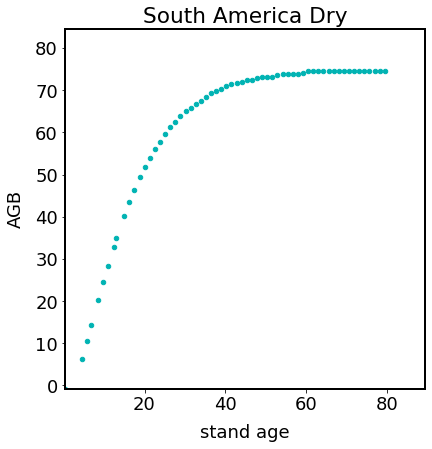

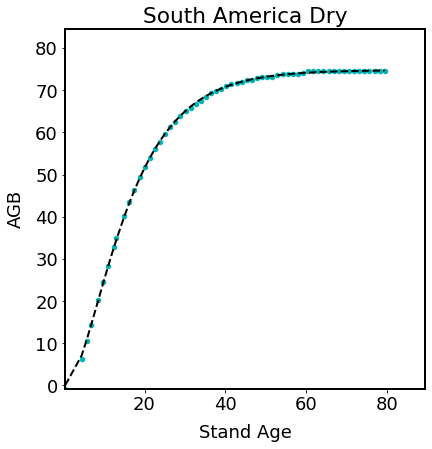

South America Humid
pars [2.47998923 0.12579473 5.18080981]  cov [[ 3.92557378e-04 -9.48373830e-06 -8.99577593e-04]
 [-9.48373830e-06  2.49862619e-07  2.17064841e-05]
 [-8.99577593e-04  2.17064841e-05  2.06166187e-03]]
<class 'numpy.ndarray'>


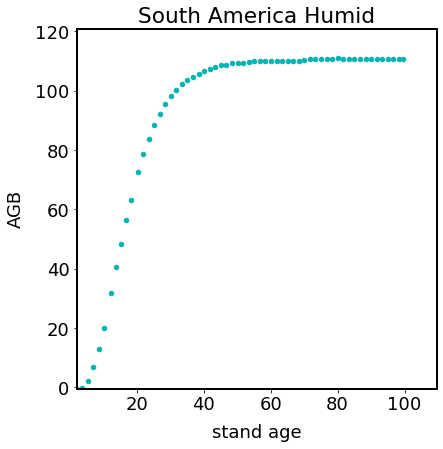

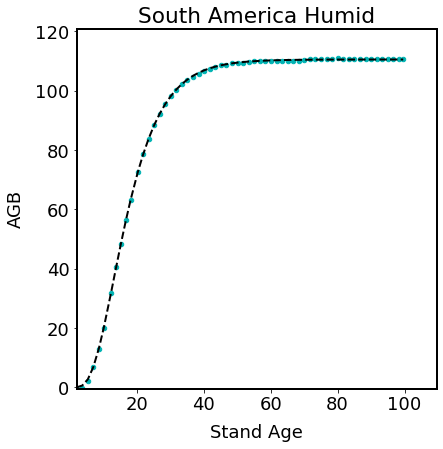

In [2]:
# analysis.py
from cmath import exp
import pandas as pd
import numpy as np
from scipy.optimize import curve_fit
import matplotlib as mpl
import matplotlib.pyplot as plt
import os
import json
from pathlib import Path

#  Chapman-Richards function looks like this:
# b0(1-EXP(-b2Age))^b2 
def chapman_richards(age:float, b0:float, b1:float, b2:float):
    return (b0 * (1 - np.exp(-b1*age))) ** b2

directory = r'C:\Users\johnj\Documents\SIG\19.restoration-fao\2022_seplan\carbon-images\tables'
files = Path(directory).glob('*.csv')
outjson = {}
for file in files:
    df = pd.read_csv(file,header=None)
    # df.sort_values(by='standAge', ascending=True, inplace=True)
    title = str(file).split('\\')[-1].split('.')[-2].replace('-',' ').title()
    print(title)
    x_dummy = df[0]
    y_dummy = df[1]
    pars, cov = curve_fit(f=chapman_richards,maxfev=10000, xdata=x_dummy, ydata=y_dummy, p0=[83, 0.5, 4], bounds=(-np.inf, np.inf))

    
    print('pars',pars,' cov', cov)
    print(type(pars))
    # Edit the font, font size, and axes width
    plt.rcParams['font.size'] = 18
    plt.rcParams['axes.linewidth'] = 2

    # Create figure object and store it in a variable called 'fig'
    fig = plt.figure(figsize=(5, 5))

    # Add axes object to our figure that takes up entire figure
    ax = fig.add_axes([0, 0, 1, 1])


    # Plot the noisy exponential data
    ax.scatter(x_dummy, y_dummy, s=20, color='#00b3b3', label='Data')

    # Add the x and y-axis labels
    ax.set_xlabel('stand age', labelpad=10)
    ax.set_ylabel('AGB', labelpad=10)

    # Set the axis limits
    ax.set_xlim(min(x_dummy), max(x_dummy)+10)
    ax.set_ylim(min(y_dummy), max(y_dummy)+10)

    #plt.savefig('dummy_dataset_exponential.png', dpi=100, bbox_inches='tight')
    plt.title(title)
    plt.show()

    # Edit the font, font size, and axes width
    # mpl.rcParams['font.family'] = 'Avenir'
    plt.rcParams['font.size'] = 18
    plt.rcParams['axes.linewidth'] = 2

    # Create figure object and store it in a variable called 'fig'
    fig = plt.figure(figsize=(5, 5))

    # Add axes object to our figure that takes up entire figure
    ax = fig.add_axes([0, 0, 1, 1])


    # Plot the noisy exponential data
    ax.scatter(x_dummy, y_dummy, s=20, color='#00b3b3', label='Data')
    ax.plot(x_dummy, chapman_richards(x_dummy, *pars), linestyle='--', linewidth=2, color='black')

    # Add the x and y-axis labels
    ax.set_xlabel('Stand Age', labelpad=10)
    ax.set_ylabel('AGB', labelpad=10)

    # Set the axis limits
    ax.set_xlim(min(x_dummy), max(x_dummy)+10)
    ax.set_ylim(min(y_dummy), max(y_dummy)+10)
    plt.title(title)
    plt.show()
    
    #format json
    #"natural_asia_humid": {
    #   "name": "Natural Asia Humid",
    #   "parameters": (22.20201292, 0.08282659, 1.65756327),
    #}
    outjson[title.lower().replace(' ','_')] = {"name":title,"parameters":tuple(pars) }

# print(outjson)
# with open('carbon.json', 'w', encoding='utf-8') as f:
#     json.dump(outjson, f, ensure_ascii=False, indent=4)
#plt.savefig('dummy_dataset_exponential_fit.png', dpi=100, bbox_inches='tight')

pars [22.20201292  0.08282659  1.65756327]  cov [[ 4.22745334e-02 -3.50576796e-05 -1.00987665e-03]
 [-3.50576796e-05  3.36450903e-08  8.34518072e-07]
 [-1.00987665e-03  8.34518072e-07  2.41301450e-05]]


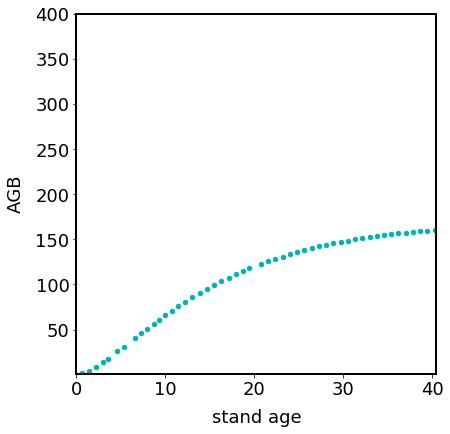

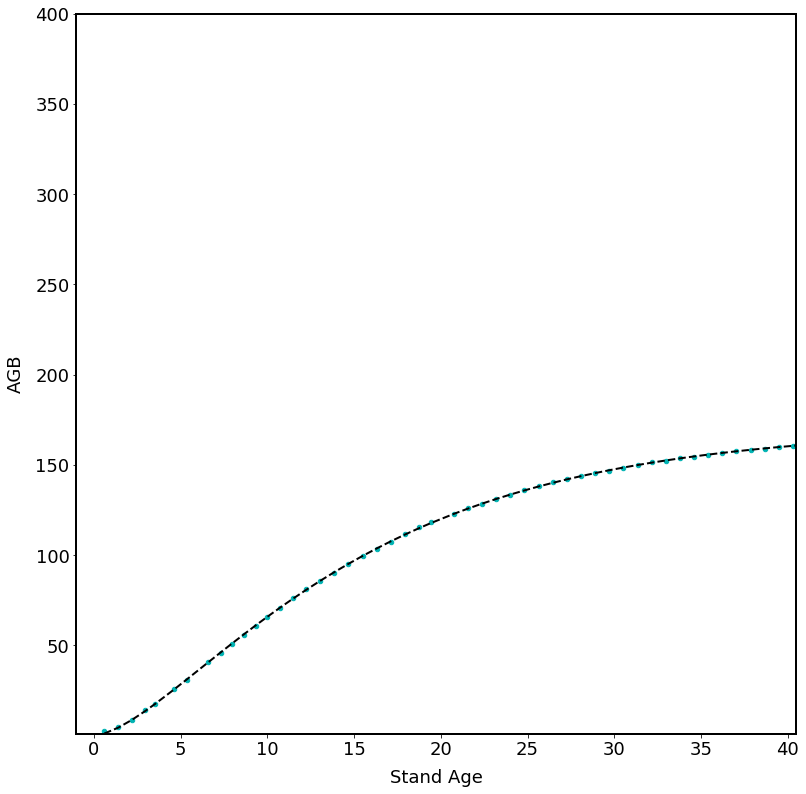

In [4]:
params = [6.952180603672807, 0.07708632118229979, 2.155374937783795]
biomass = chapman_richards(100, params[0], params[1], params[2])
	
# This will report metric tonnes of carbon per ha (NOT CO2e)
biomass
#  Chapman-Richards function looks like this:
# b0(1-EXP(-b2Age))^b2 
# (b0 * (1 - np.exp(-b1*age))) ** b2
def chapman_richards_center(age:float, b0:float, b1:float, b2:float):
    return (1 - np.exp(-b1*age))
print(chapman_richards_center(100, params[0], params[1], params[2]))

0.9995510648524716
